In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alibaba-stock-dataset-2025/Ali_Baba_Stock_Data.csv


In [2]:
df=pd.read_csv('/kaggle/input/alibaba-stock-dataset-2025/Ali_Baba_Stock_Data.csv')

In [3]:
y=df['Adj Close']
X=df.drop(['Adj Close','Date'],axis=1)

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
def prepare_data(X, y, time_steps=30):
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()   
    X_scaled = X_scaler.fit_transform(X)
    y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))
    X_seq, y_seq = [], []
    for i in range(len(X_scaled) - time_steps):
        X_seq.append(X_scaled[i:i+time_steps])
        y_seq.append(y_scaled[i+time_steps])
    
    return np.array(X_seq), np.array(y_seq), y_scaler
def build_gru_model(input_shape):
    model = Sequential([
        GRU(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse') 
    return model  
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model  
    


2025-08-08 12:10:25.259058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754655025.457377      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754655025.516915      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
time_steps = 30
X_seq, y_seq, y_scaler = prepare_data(X, y, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
gru_model = build_gru_model((X_train.shape[1], X_train.shape[2]))
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)


Epoch 1/30


2025-08-08 12:10:39.482299: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0222 - val_loss: 9.2853e-04
Epoch 2/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 3/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0021 - val_loss: 7.2965e-04
Epoch 4/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0022 - val_loss: 8.0367e-04
Epoch 5/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0022 - val_loss: 7.2338e-04
Epoch 6/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0019 - val_loss: 6.6553e-04
Epoch 7/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0018 - val_loss: 8.3546e-04
Epoch 8/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0018 - val_loss: 6.2100e-04
Epoch 9/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0015 - val_loss: 5.9341e-04
Epoch 10/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0014 - val_loss: 6.3140e-04
Epoch 11/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0015 - val_loss: 6.2144e-04
Epoch 12/30


In [6]:
gru_pred = gru_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred = y_scaler.inverse_transform(gru_pred)
lstm_pred = y_scaler.inverse_transform(lstm_pred)
y_test_orig = y_scaler.inverse_transform(y_test)
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [7]:
gru_rmse, gru_r2 = calculate_metrics(y_test_orig, gru_pred)
lstm_rmse, lstm_r2 = calculate_metrics(y_test_orig, lstm_pred)
print(f"GRU Model - RMSE: {gru_rmse:.4f}, R2 Score: {gru_r2:.4f}")
print(f"LSTM Model - RMSE: {lstm_rmse:.4f}, R2 Score: {lstm_r2:.4f}")

GRU Model - RMSE: 3.9347, R2 Score: 0.8628
LSTM Model - RMSE: 3.8755, R2 Score: 0.8669


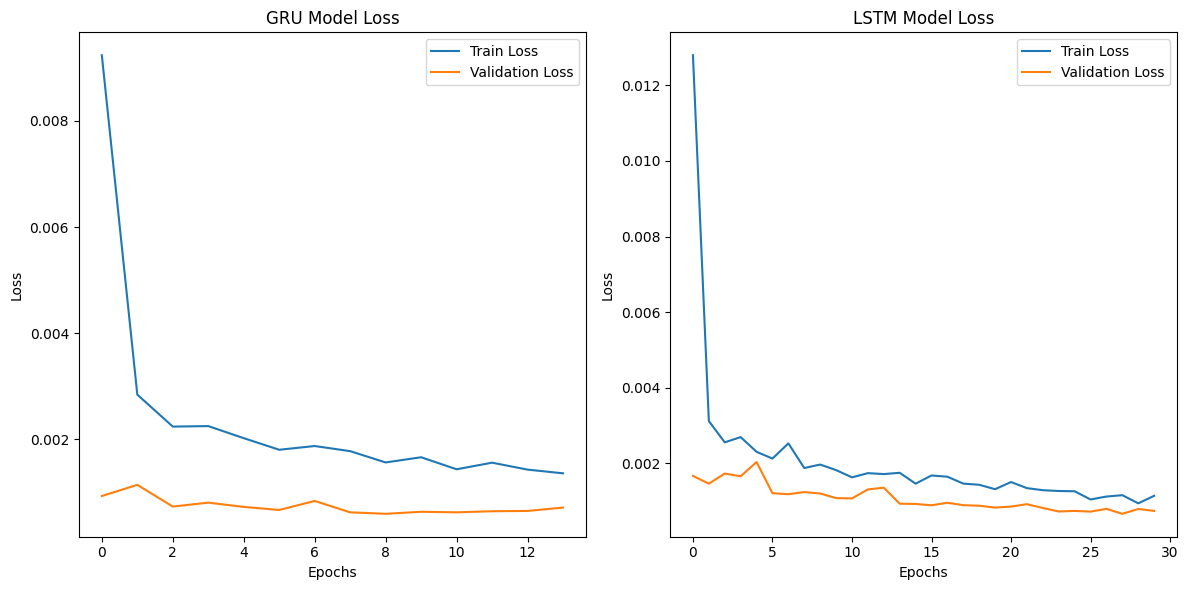

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(gru_history.history['loss'], label='Train Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

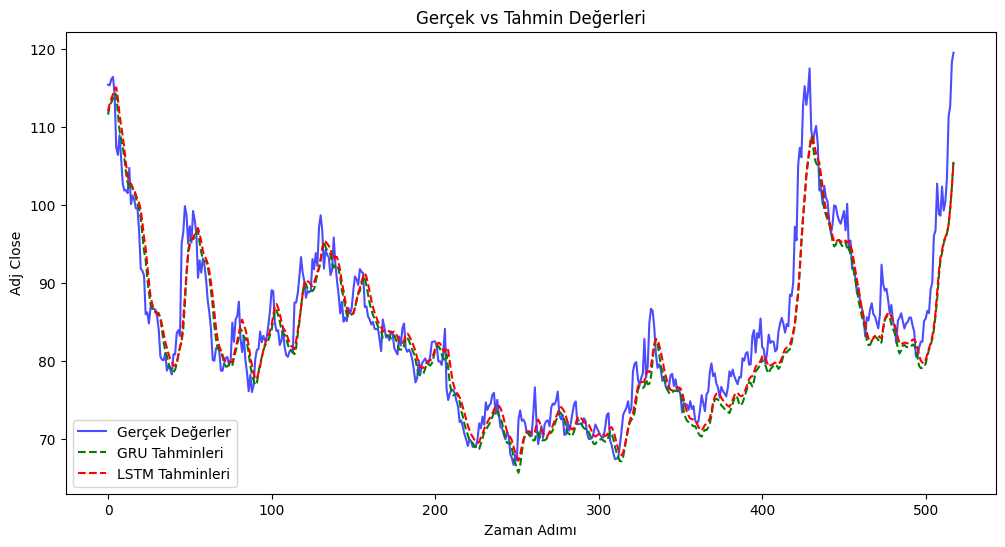

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label='Gerçek Değerler', color='blue', alpha=0.7)
plt.plot(gru_pred, label='GRU Tahminleri', color='green', linestyle='--')
plt.plot(lstm_pred, label='LSTM Tahminleri', color='red', linestyle='--')
plt.title('Gerçek vs Tahmin Değerleri')
plt.xlabel('Zaman Adımı')
plt.ylabel('Adj Close')
plt.legend()
plt.show()